# **Reconhecimento Ótico de Caracteres (OCR) com PyTesseract** #

**Primeiro temos que entender, o fluxo de um processo OCR.**

1. API request, com a imagem alvo

2. Pré-processamento
    - Conversão para grayscale
    - Binarização (branco e preto)
    - Remoção de ruído
    - Correção de inclinação
    - Uso da biblioteca Leptonica para manipulação*.

3. Motor Tesseract
    - Uso de modelos treinados com caracteres

4. Pós-processamento
    - Correção ortográfica
    - Formatação
    - Validação de padrões

5. Resposta da API

![](https://miro.medium.com/max/1400/1*X7RfC5wOZ-Gsoo95Ez1FvQ.png) 



In [83]:
# Instalar o motor tesseract 
# Para windows = https://github.com/UB-Mannheim/tesseract/wiki
# Para linux = !sudo apt install tesseract-ocr
# Instalar pip install tesseract
# Instalar pip install pytesseract
import cv2
import pytesseract
from pytesseract import Output
import numpy as np
from matplotlib import pyplot as plt

#Informar onde o motor Tesseract está instalado

pytesseract.pytesseract.tesseract_cmd = r'C:/MotorTesseract/tesseract.exe'


def imshow(titulo = 'Imagem', imagem = None, size = 10):
    w, h = imagem.shape[0], imagem.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.show()



In [84]:
#Vendo linguagens suportadas

from pytesseract import get_languages

print(get_languages('/usr/share/tessdata'))  # or any other path that applies to your system



['eng', 'osd', 'por']


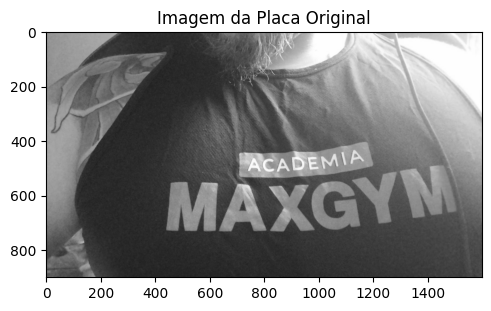

Texto extraído: vi

29

k

[a

À

2h,

AXGY

+



In [85]:
#TESTANDO O OCR
#NECESSITA DE UMA IMAGEM EM ESCALA DE CINZA, MINIMAMENTE.
img = cv2.imread('imagens/Camiseta.jpg', 0)

img = cv2.flip(img,1)

imshow('Imagem da Placa Original', img)


#Aplicar o PyTesseract

"""
Modos de Segmentação de Página (--psm)
O --psm define como o Tesseract interpreta o layout da imagem:

3	Padrão (modo automático)
6	Supõe um único bloco de texto
7	Apenas uma linha de texto
8	Apenas uma palavra
11	Texto espalhado na imagem

Motor OCR - parametro --oem

0 - Tesseract Legacy
1 - LSTM
2 - Legacy + LSTM
3 - LSTM

"""

confgs = '--psm 11 --oem 3'

saida = pytesseract.image_to_string(img, lang='por', config=confgs)

print("Texto extraído: {}".format(saida))

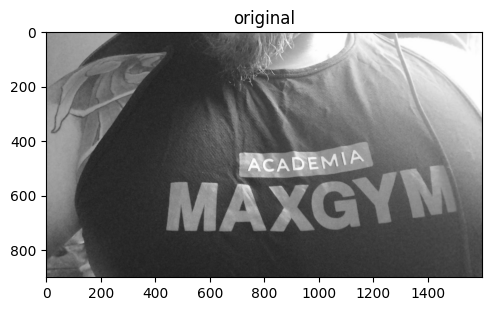

[[136 139 141 ... 253 253 254]
 [135 137 140 ... 252 253 253]
 [134 136 139 ... 252 253 253]
 ...
 [ 99  98  98 ...  75  80  77]
 [100  99  99 ...  75  76  70]
 [101 101 100 ...  74  70  62]]


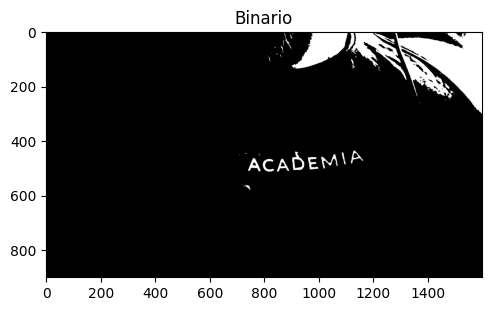

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [86]:
#TESTANDO COM IMAGEM BINARIZADA
img = cv2.imread('imagens/Camiseta.jpg', 0)

img = cv2.flip(img,1)

imshow('original', img)
print(img)

RET, thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)
imshow("Binario", thresh) 


saida = pytesseract.image_to_data(thresh, lang='por', config=confgs, output_type= Output.DICT)

print(saida.keys())

0: 
1: 
2: 
3: 
4: ACADEMIA
5: 
6: 
7: 
8: "
[-1, -1, -1, -1, 72, -1, -1, -1, 0]
[-1, -1, -1, -1, 72, -1, -1, -1, 0]
[-1, -1, -1, -1, 72, -1, -1, -1, 0]
[-1, -1, -1, -1, 72, -1, -1, -1, 0]
[-1, -1, -1, -1, 72, -1, -1, -1, 0]
[-1, -1, -1, -1, 72, -1, -1, -1, 0]
[-1, -1, -1, -1, 72, -1, -1, -1, 0]
[-1, -1, -1, -1, 72, -1, -1, -1, 0]
[-1, -1, -1, -1, 72, -1, -1, -1, 0]


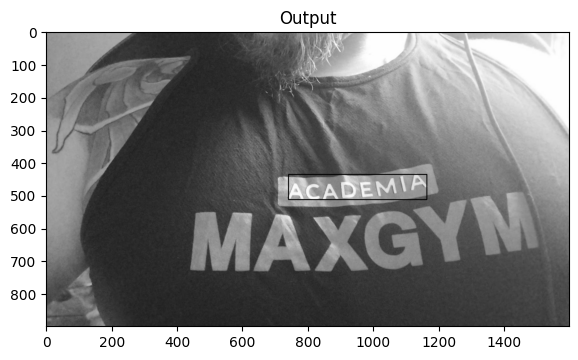

In [87]:
boxes = len(saida['text'])

j = 0
for i in saida['text']:
    print(f'{j}: {i}')
    j= j + 1

for item in range(boxes):
    print(saida['conf'])
    if int(saida['conf'][item]) > 71: #Confiança, ou seja, a precisão daquilo ser uma palavra.
        (x, y, w, h) = (saida['left'][item],saida['top'][item],saida['width'][item], saida['height'][item])
        img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255, 0), 2)

imshow('Output', img, size = 12)
    